
üåÄ Running diagnostics for: Synthetic_Bhola (2035, NI)
üåç Downloading LitPop for: India
‚úÖ India exposure clipped to bounds: (86.0, 13.0, 93.5, 26.0)
üåç Downloading LitPop for: Bangladesh
‚úÖ Bangladesh exposure clipped to bounds: (86.0, 13.0, 93.5, 26.0)
‚úÖ Exposure loaded with 18344 points.
üó∫Ô∏è Track bounds with buffer: (86.0, 13.0, 93.5, 26.0)
üìç Generated 9956 centroids at 0.1¬∞ resolution.
‚úÖ Hazard object created with shape: (1, 9956)
‚úÖ Impact function assigned.
üí∞ Total direct impact (AAI): $20,196,096,741
üí• Total impact: $20,196,096,741
Plotted zones (> $1,000,000): 914
‚úÖ Impact extracted with 914 zones above threshold.
üìä Total impact (from metadata): $20,196,096,741
‚úÖ Boundary GDF loaded: <class 'geopandas.geodataframe.GeoDataFrame'>
‚úÖ Exposure plotted via scatter.
‚úÖ Impact plotted via points.
‚úÖ Boundary overlay plotted.
‚úÖ Storm track plotted.
‚úÖ Figure saved to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bh

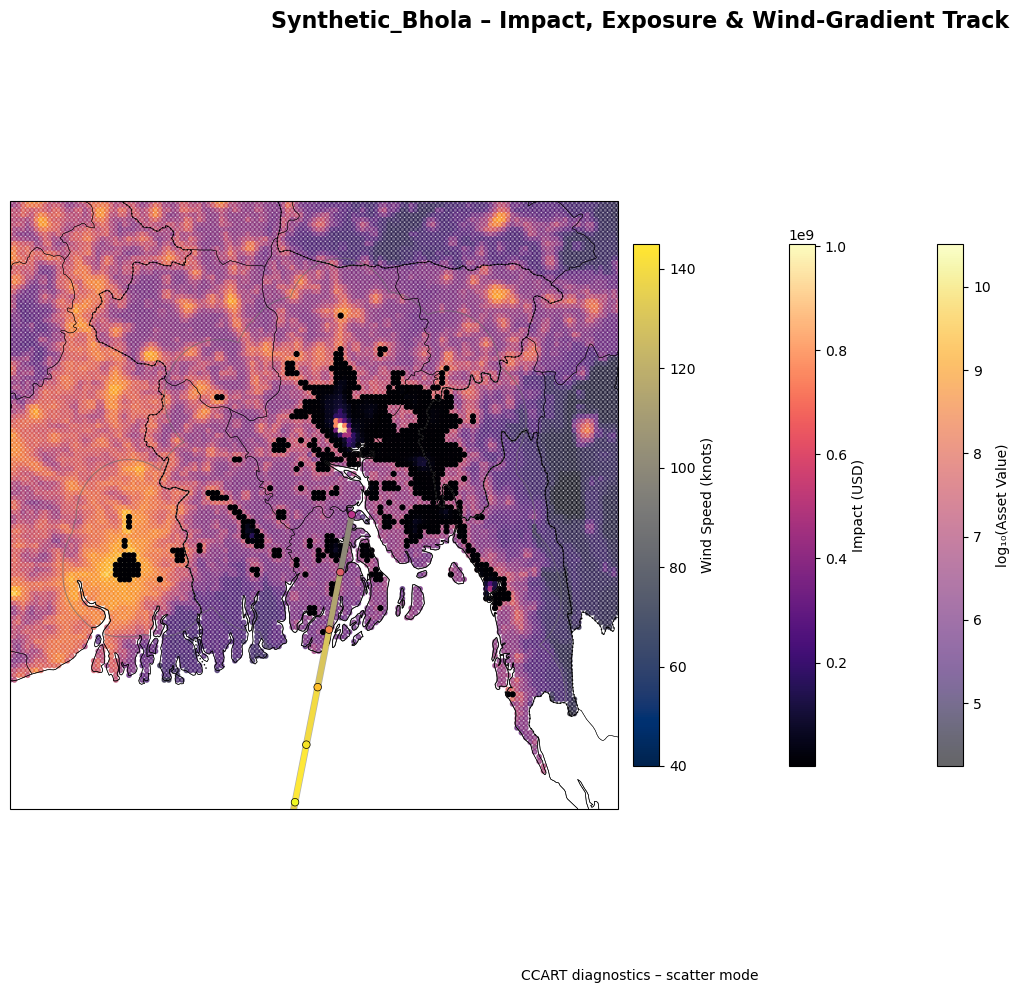


üí• Total impact: $19,535,145,320
Plotted zones (> $1M): 914
‚úÖ Storm track exported to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_track.geojson
‚úÖ Exposure exported to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_exposure.geojson
‚úÖ Impact exported to: c:\CMIP data\GitHub Clean\ccart-cyclone-impact-modeling\outputs\synthetic_bhola_impact.geojson
‚úÖ Pipeline executed successfully.
üßÆ Impact zones:


impact_usd   latitude  longitude                   geometry
265  2.751993e+06  24.062500  91.395833  POINT (91.39583 24.06250)
303  3.679739e+06  24.020833  91.395833  POINT (91.39583 24.02083)
304  1.252841e+06  24.020833  91.437500  POINT (91.43750 24.02083)
342  1.540920e+06  23.979167  91.270833  POINT (91.27083 23.97917)
343  3.872107e+06  23.979167  91.312500  POINT (91.31250 23.97917)

üèôÔ∏è Exposure points:


value  region_id  impf_  impf_TC                   geometry  \
0  9.015559e+04        356      1        1  POINT (88.85417 21.60417)   
1  1.845753e+05        356      1        1  POINT (88.85417 21.56250)   
2  1.336241e+05        356      1        1  POINT (88.89583 21.56250)   
3  8.487188e+06        356      1        1  POINT (88.14583 21.85417)   
4  5.139400e+06        356      1        1  POINT (88.10417 21.81250)   

   centr_TC  
0      3373  
1      3373  
2      3373  
3      3137  
4      3213

üåÄ Storm track (GeoDataFrame):


lon   lat                   geometry
0  89.000000  16.0  POINT (89.00000 16.00000)
1  89.107143  16.5  POINT (89.10714 16.50000)
2  89.214286  17.0  POINT (89.21429 17.00000)
3  89.321429  17.5  POINT (89.32143 17.50000)
4  89.428571  18.0  POINT (89.42857 18.00000)

üìä Track metadata preview:


time  max_sustained_wind  central_pressure  \
0 1991-12-01 16:00:00                  40             980.0   
1 1991-12-01 17:00:00                  45             977.5   
2 1991-12-01 18:00:00                  50             975.0   
3 1991-12-01 19:00:00                  60             970.0   
4 1991-12-01 20:00:00                  70             965.0   

   environmental_pressure  radius_max_wind  time_step basin   lat        lon  
0                    1010             60.0          3    NI  16.0  89.000000  
1                    1010             55.0          3    NI  16.5  89.107143  
2                    1010             50.0          3    NI  17.0  89.214286  
3                    1010             45.0          3    NI  17.5  89.321429  
4                    1010             40.0          3    NI  18.0  89.428571

‚úÖ All outputs exported successfully.
‚ö†Ô∏è Missing wind data or impact points.


In [1]:
# üìå 1. Setup
import os
import sys
from datetime import datetime
import geopandas as gpd

# Add scripts folder to path
script_dir = "C:/CMIP data/GitHub Clean/ccart-cyclone-impact-modeling/scripts"
if script_dir not in sys.path:
    sys.path.append(script_dir)

# Import pipeline runner
from function_load_synthetic_track import load_synthetic_bhola_track
from function_run_ccart_pipeline import run_ccart_pipeline

# üìå 2. Load synthetic Bhola track
track = load_synthetic_bhola_track()  # ‚úÖ This defines 'track'

# üìå 3. Define Inputs
boundary_path = "C:/CMIP data/cmip6/Climada/Country Shape Files/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

def normalize_country_names(codes):
    mapping = {
        "IND": "India",
        "BGD": "Bangladesh",
        "USA": "United States of America",
        # Add more as needed
    }
    return [mapping.get(code, code) for code in codes]

countries = normalize_country_names(["IND", "BGD"])

# üìå 4. Run Pipeline
result = run_ccart_pipeline(
    name="Synthetic_Bhola",
    year=2035,
    basin="NI",
    countries=countries,
    boundary_path=boundary_path,
    save_fig=True,
    track_override=track
)

# üìå 5. Unpack and Inspect
if result:
    gdf_litpop, gdf_impact, gdf_track, track = result
    print("‚úÖ Pipeline executed successfully.")
else:
    print("‚ö†Ô∏è Pipeline failed.")

# üìå 6. Preview Outputs
print("üßÆ Impact zones:")
display(gdf_impact.head())

print("üèôÔ∏è Exposure points:")
display(gdf_litpop.head())

print("üåÄ Storm track (GeoDataFrame):")
display(gdf_track.head())

# üìå 6b. Preview Track Metadata (xarray)
track_df = track.to_dataframe().reset_index()
print("üìä Track metadata preview:")
display(track_df.head())

# üìå 7. Export GeoJSONs
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
output_dir = f"../outputs/amphan_{timestamp}"
os.makedirs(output_dir, exist_ok=True)

gdf_litpop.to_file(f"{output_dir}/exposure.geojson", driver="GeoJSON")
gdf_impact.to_file(f"{output_dir}/impact.geojson", driver="GeoJSON")
gdf_track.to_file(f"{output_dir}/track.geojson", driver="GeoJSON")

print("‚úÖ All outputs exported successfully.")

# üìå 8. Optional: Plot Diagnostics Inline
from function_plot_diagnostics import plot_tc_impact

plot_tc_impact(
    track=gdf_track,
    gdf_litpop=gdf_litpop,
    gdf_impact=gdf_impact,
    title="Synthetic Bhola 2035 ‚Äì Impact, Exposure & Wind-Gradient Track",
    boundary_gdf=None,
    save_fig=False
)


